### Generating Sentinel-2 Data

To produce images of the following locations:
- Swinburne Uni
- Melbourne CBD
- Phillip Island
---

#### Steps to produce images
1. Determine coordinates or multipolygon of above locations
2. Determine RGB bands for visualising a clear image 
3. Query image
---

#### Step 1 - Determine coordinates or multipolygon of above locations
---

In [ ]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

"""
username: "zach789"
pwd: "cKw!v9wKijgw57Q"
api_url = "https://apihub.copernicus.eu/apihub"

show_progressbars & timeout is optional
"""
api = SentinelAPI("zach789", "cKw!v9wKijgw57Q", "https://apihub.copernicus.eu/apihub", show_progressbars=True, timeout=60)

# Search product ID using OpenSearch
data_date = date=(date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "platformname": "Sentinel-2"
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw) # important: producttype='L2__CH4___'


# Testing with result's structure
# print(result) # (product ID, product attribute) ordered dictionary value



---
### Retrieving data
The cell below is to explore how to search and download a particular product. The [product](https://s5phub.copernicus.eu/dhus/odata/v1/Products('93ea5d16-84dc-4d42-bd77-9fa7120376e4')/$value) is one of many S5P datasets in the [S5P Pre-Ops Data Hub](https://s5phub.copernicus.eu/dhus/#/home).

The attributes of the product are picked to test out the funcitonality of the sentinelsat library and OpenSearch API

***Result:*** 
The [product](https://s5phub.copernicus.eu/dhus/odata/v1/Products('93ea5d16-84dc-4d42-bd77-9fa7120376e4')/$value) was narrowed down and found with search query 

***TODO:*** 
Determine the appropriate keyword arguments necessary for querying based on user input

In [ ]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

"""
username & pwd: "s5pguest"
api_url = "https://s5phub.copernicus.eu/dhus"

show_progressbars & timeout is optional
"""
api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True,timeout=60)

# Search product ID using OpenSearch
data_date = date=(date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "orbitnumber": 28925
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw) # important: producttype='L2__CH4___'


# Testing with result's structure
# print(result) # (product ID, product attribute) ordered dictionary value



In [ ]:
# Get product id
# For easy access to the ordered dictionary value, use next(iter(result)) where 
# iter is an iterator and next returns the next value in the iterator
result_iter = next(iter(result))
product_id = result_iter

# for attribute in result[product_id]:
#     print(attribute)

# download data
# download_dir = 'C:\Users\Joshua\OneDrive - Swinburne University\Swinburne\SWE40001\Software-Engineering-Project-A\Download Results'
# api.download(product_id, download_dir)

### Test conversion to dataframe, geodataframe and geojson as well as plot

In [ ]:
# Not used atm
import geopandas as gpd
import numpy as np

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)

# Establish legend keywords for legend details
legend_keyw = {"label": "Methane concentration data for orbit 28925", "orientation": "vertical"}

# Checking the types of metadata stored in the result
# print(result_gdf.head())

# Plot the data
print(result_gdf.plot(legend=True, legend_kwds=legend_keyw))



---
## Sentinel 2 Band data
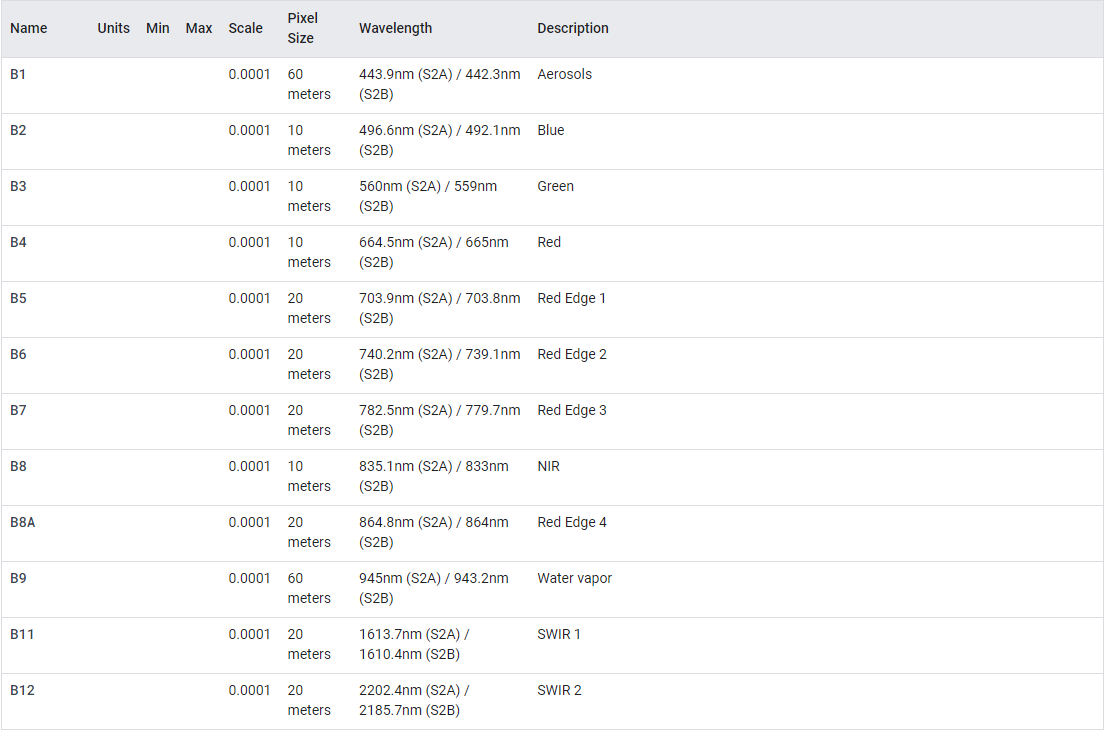

- Band 2-4 is the image in RGB format separately (quite literally RGB)
- Band 5-7, 8A shows Red Edge, the region of rapid change in reflectance of vegetation in the NIR range.
- Band 8 is the image in NIR range format
- Band 9 shows water vapor
- Band 11-12 shows image in short wave infrared (SWIR) format


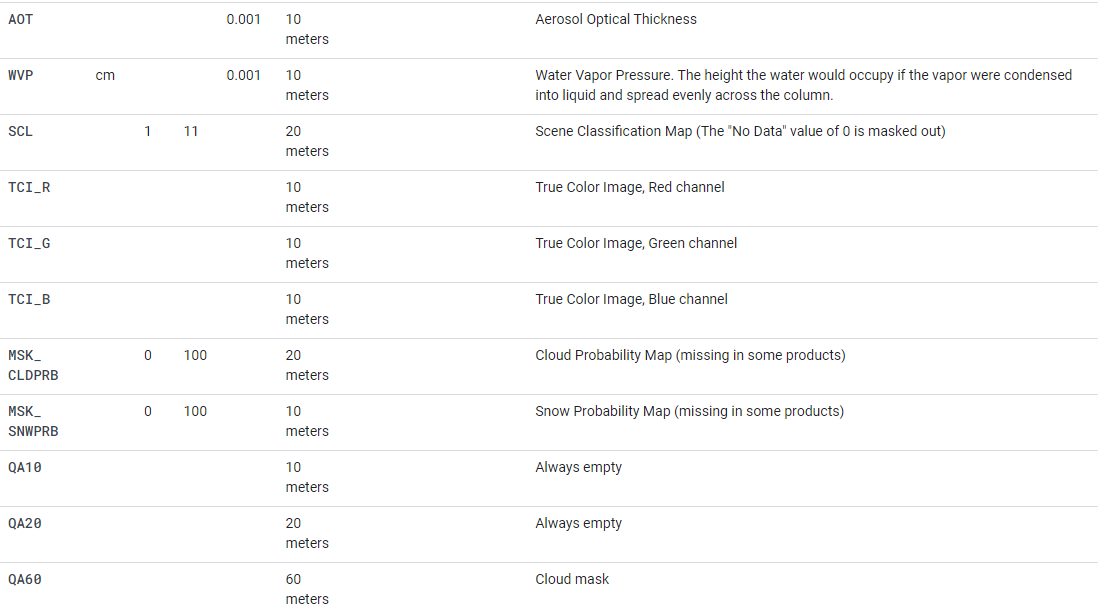

--- 
# Retrieving and producing Sentinel 2 data
---

***NOTE: The following information was produced in Google Earth Engine***

Resources: 
- [Loading Landsat 8 data into Google Earth Engine](https://www.youtube.com/watch?v=zNXCliP1QWs)
- [Loading Sentinel-2 data into Google Earth Engine](https://www.youtube.com/watch?v=gbd9uujEFfE) (Part 2 continuation from above)

---

### Geometries on maps

To focus on a part of the map, a geometry shape is required. 
The geometry's data uses a dictionary (key, value) structure that stores:
1. the geometry type
2. A nested list where the inner list is a list of coordinate points and represents the coordinate points for a geometry shape. Having more than one inner list means the map has multiple geometry shapes drawn. 

The following shows the geometry shape types that can be made 
### Point geometry
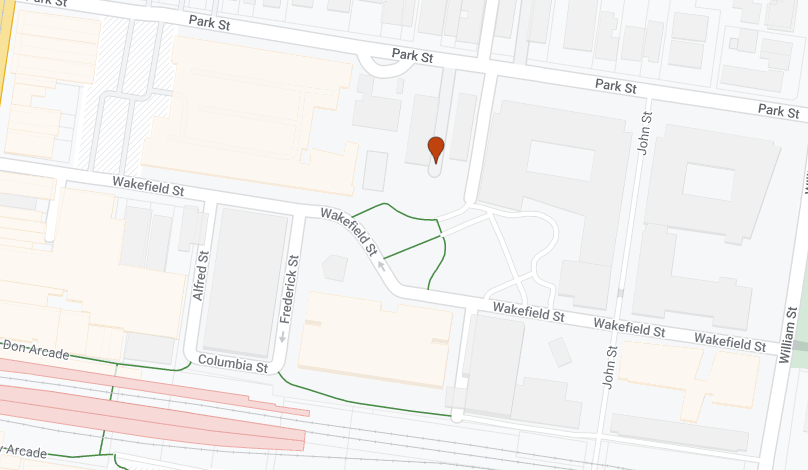
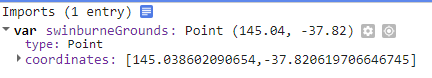

### Line geometry
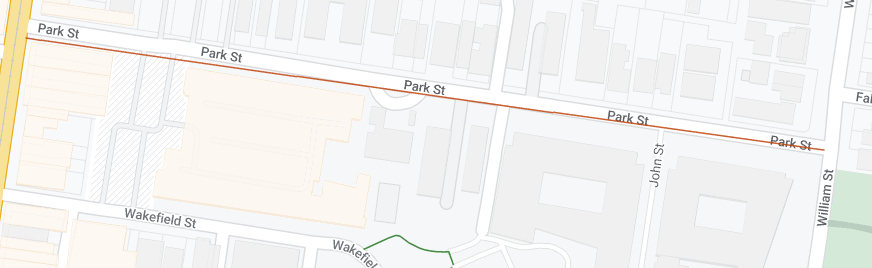
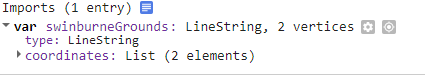

### 4 sided polygon geometry
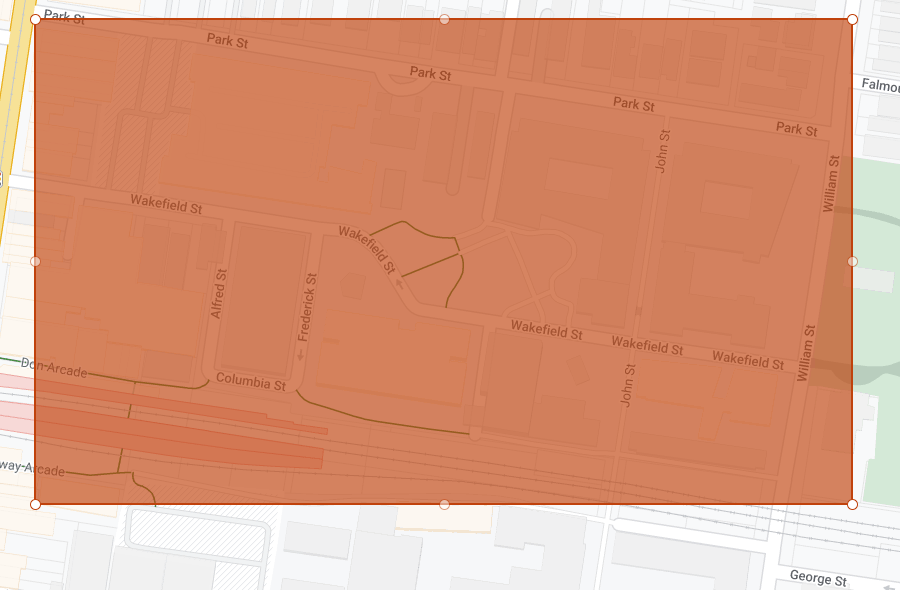
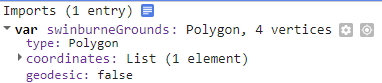

### Multi-sided Polygon geometry
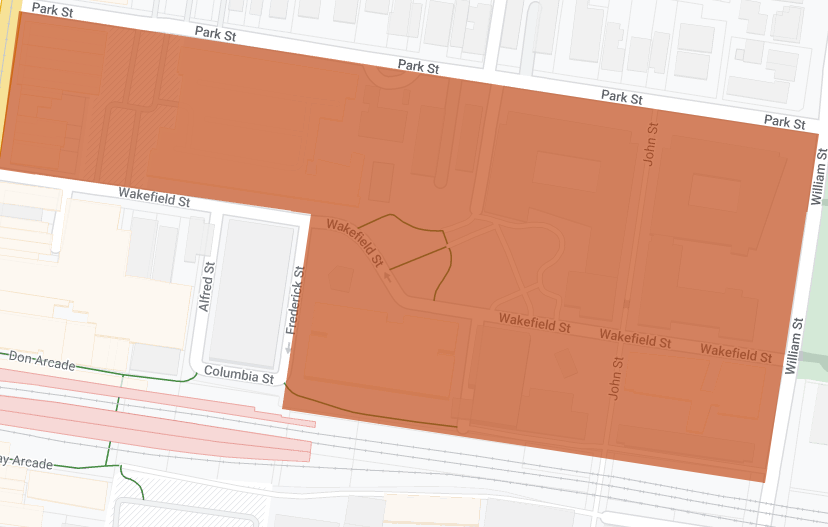
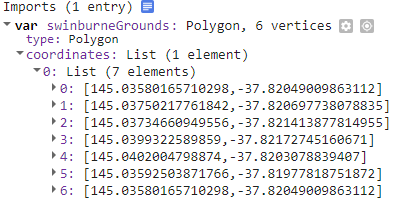

---

### Importing Sentinel 2 data
Google allows imports of geospatial data. To import, search for the product in the search bar. 

For Sentinel 2, you can search for copernicus sentinel 2 and choose the Level 2A product. The imported data will be in a variable as shown. 

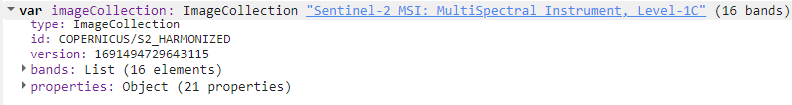

--- 

### Producing the Sentinel 2 data
To produce the image, the following steps are done to produce the code as shown below:
1. Define the image to use (Also use filters to narrow down images to use)
2. Define the visual parameters to use for the image production
3. Center the map to the region of interest
4. Add the image as a layer on top of the map

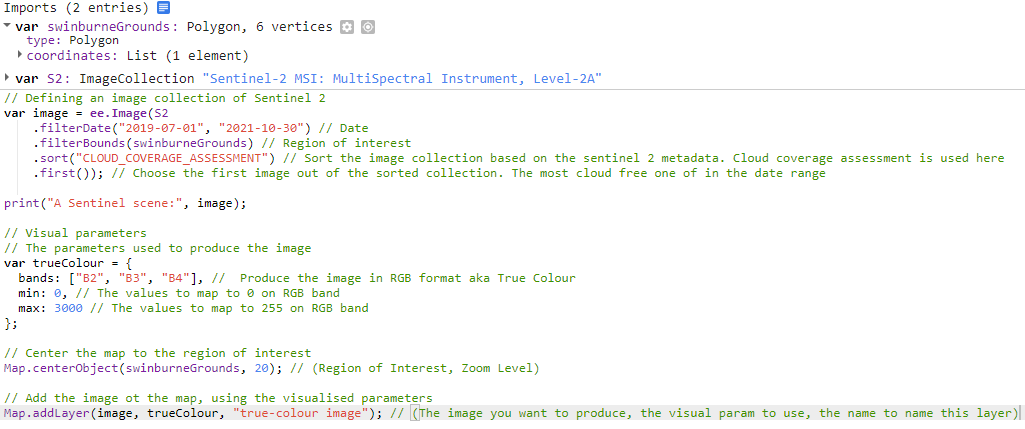

---

## Findings
- Tried to visualise swinburne campus but is not possible as Sentinel 2's image resolution is between 10m to 60m
  
  TODO: Will need to define a limit to 10m - 60m to produce images

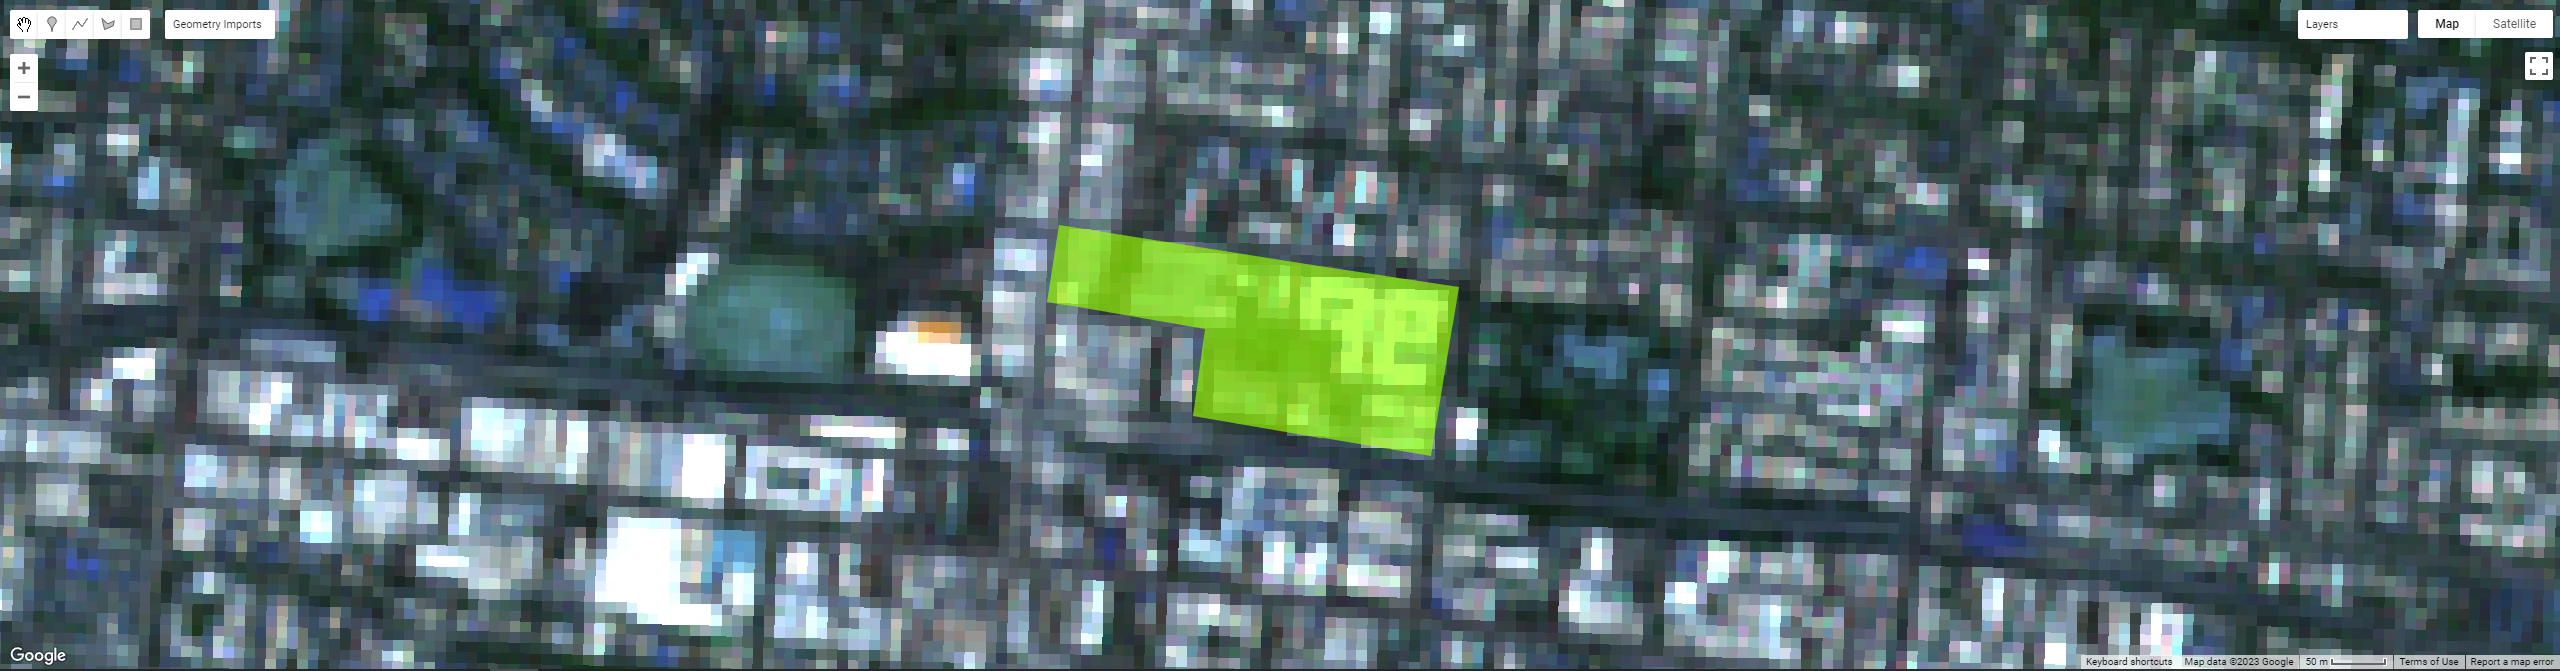

- The code only chooses one image out of the defined collection, thus leaving out certain parts of the maps unvisualized. 
  
  TODO: Find a way to cover unvisualized region 
   
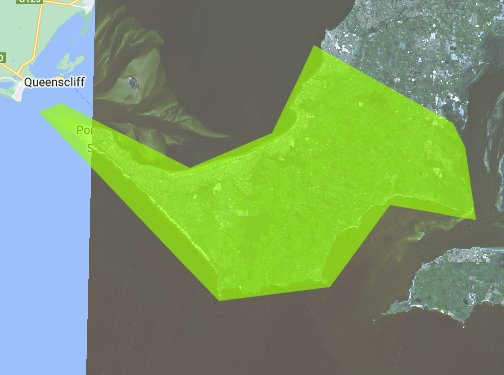